# 9주차 Support Vector Machine

지지벡터 기계라고 번역을 하기도 한다. 

대부분 분류 문제에 사용하고, 회귀문제로 가게 되면 SVR(support Vector Regression)이라는 방법을 사용하기도 한다.
SVM 알고리즘의 핵심은 n차원 공간에 있는 데이터들을 가장 잘 구분하는 `경계선` 또는 `경계면(초평면)`을 찾는 것이다.

## 파이썬 Sklearn SVM Parameter

1. Kernel
 - rbf(radial basis function), linear, poly(polynomial)
 - 기본 값으로 rbf를 설정 (값은 특정 중심에서 거리에 의존하는 함수 값)
 
2. C
 - 얼마만큼의 여유를 가지고 오류를 인정할 건지에 대한 값
 - 기본값으로 1.0 설정
 - 값을 낮출 경우 초평면이 매끄러워짐
 - 값을 높일 경우 서포트 벡터들을 다 잘 분류함
 
3. Gamma
 - 기본값으로 auto 설정
 - 값을 낮출 경우 초평면에서 멀리 떨어진 서포트 벡터들의 영향이 낮음
 - 값을 높일 경우 멀리 떨어진 요소들의 값이 영향이 큼
 - 값을 높일 경우 초평면에 인접한 서포트 벡터들의 영향(weight)이 커지기 때문에 초평변이 울퉁불퉁(uneven)하게 됨
 
### SVM Overfitting
과최적화 : 훈련 데이터에 대해서 모델이 최적화된 경우를 의미. 학습 데이터의 패턴을 벗어나는 새로운 데이터에 대해선 분류를 제대로 못하는 경우가 발생한다. Machine Learning에서는 과최적화된 경우를 피해야 한다.

### 1. Python Package 가져오기

In [6]:
import numpy as np # 파이썬 언어를 위한 행렬, 벡터 등의 수학 계산을 위한 자료구조로서 계산 함수를 제공
import pandas as pd # 데이터 분석, 가공, 처리 등을 쉽게 하기 위한 자료구조와 처리 함수들을 제공하는 패키지
import matplotlib.pyplot as plt # 시각화 패키지
from sklearn import svm, datasets # skelarn : 분류, 회귀, 군집 등의 문제에 대한 다양한 알고리즘을 제공
                                                  # svm : sklearn 패키지에서 제공하는 Support Vector Machine을 도와주는 모듈
                                                  # datasets : sklearn 패키지에서 제공하는 open datasets를 로드할 때 사용 (iris, tennis, titanic, boston 등)
%matplotlib inline

### 2. Iris dataset 로드하기

In [3]:
iris = datasets.load_iris() # dictionary 자료형
print(iris.keys())
print(iris.data.shape) # data의 전체 행과 열의 길이를 출력
print(iris.feature_names) # data의 feature_names 

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


### 3. Iris dataset 정보 보기

In [ ]:
print(iris.DESCR) # sklearn에서 제공하는 open dataset은 DESCR이라는 함수를 통해서 데이터셋에 어떤 정보가 있는지를 확인해볼 수 있다.

### 4. 데이터 학습시키기

In [10]:
x = iris.data[: , : 2] # iris 변수에 전체 데이터 중 data에 해당하는 값 중 2개 열과 전체 행 값을 저장한 변수
y = iris.target # iris 변수에 전체 데이터 중 traget에 해당하는 값을 저장한 변수
SVM = svm.SVC(kernel='linear', C=1).fit(x,y) # 학습된 SVM 모델을 저장한 변수

### 5. 데이터 시각화 전처리

In [15]:
x_min, x_max = x[:,0].min()-1, x[:,0].max()+1  # x_min, x_max : plot의 처음과 끝 값을 지정하기 위한 변수
y_min, y_max = x[:, 1].min()-1, x[:, 1].max()+1 # plot의 처음과 끝 값을 지정해주기 위한 변수
plot_unit = 0.025 # 축의 단위를 설정하는 변수(plot을 그릴 때 배경에 세밀한 정도를 나타내기 때문에 그 수치를 낮게 잡아서 세밀하게 확인)
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_unit), np.arange(y_min, y_max, plot_unit)) # plot_unit값만큼 균등하게 간격을 둔 1차원 배열 형태의 데이터를 만든다.
                    # np.meshgrid() 1차원 배열 형태의 데이터들이 주어지면 2차원 배열 형태로 교체한 뒤, xx 그리고 yy 변수에 저장
                    # xx : x가 y의 차원 크기의 행의 개수 만큼 반복된 값을 가지고 있는 변수
                    # yy : y가 x의 차원 크기의 열의 개수 만큼 반복된 값을 가지고 있는 변수

### 6. 데이터 시각화 및 성능 측정
  커널 parameter를 linear로 주었기 떄문에 선으로 데이터를 분류한 결과를 확인할 수 있다.

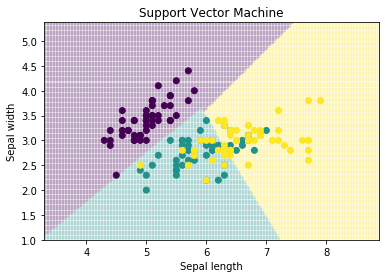

정확도 :  0.82


In [21]:
z = SVM.predict(np.c_[xx.ravel(), yy.ravel()]) # xx와 yy 변수에 저장된 행렬의 1행부터 순차적으로 값을 불러와서 1차원 배열을 만든다.
                                                                # 이렇게 만든 배열을 np.c_[ ] 함수를 이용해 배열에 열을 추가한 뒤에, 학습된 SVM 모델에 데이터를 입력한 후,
                                                                # 어떤 class의 값인지 분류한 값을 z라고 하는 변수에 저장한다.
z = z.reshape(xx.shape)# z변수의 차원을 xx변수의 차원과 같은 차원으로 '재형성'한 다음에 다시 z 변수에 저장한다. 해당 차원을 같게 만들어준 이유는 plot을 할 때 같은 차원의 데이터를 사용해야 하기 떄문이다.
plt.pcolormesh(xx, yy, z, alpha=0.1) # 입력받은 3개의 데이터를 그래프로 표현한다.
plt.scatter(x[:,0], x[:, 1], c=y) # x변수 첫 번째 컬럼에 저장된 데이터를 x축, 두 번째 컬럼을 y축으로 하여 산점도를 그린다.
plt.xlabel('Sepal length') # x축 이름 설정
plt.ylabel('Sepal width') # y축 이름 설정
plt.xlim(xx.min(), xx.max()) # plot으로 보여줄 x축의 범위를 xx.min() 값에서 xx.max()라고 하는 함수의 리턴값을 지정해서 보여준다.
plt.title('Support Vector Machine') # plot의 제목 설정
plt.show() # 입력된 plot을 화면에 출력한다.
print("정확도 : ", SVM.score(X=x, y=y)) # 학습된 SVM모델을 통해서 입력된 데이터를 분류한 뒤에 실제 값과 비교해 분류 정확도를 출력

# SVMl Paremeter 조정법
## 데이터 파라미터 조정 및 성능 측정
 kernel 파라미터를 `rbf`로 변경하면 선형이 아닌 비선형으로 분류된다.
 ![스크린샷, 2017-11-10 02-21-14](https://i.imgur.com/vxWGoSp.png)
 
 ![스크린샷, 2017-11-10 02-23-43](https://i.imgur.com/S9gIpTJ.png)
 Gomma값을 낮추면 멀리 떨어진 서포트 벡터(support vector)들의 영향이 낮아지고, 값을 높이면 멀리 떨어진 벡터들의 값이 영향을 크게 하는 파라미터가 된다.
![스크린샷, 2017-11-10 02-23-29](https://i.imgur.com/wmBBEId.png)
Gamma=100이 되면 margin이 매우 많이 작아진 것을 확인할 수 있고, 성능이 향상되었지만 Overfiiting의 문제가 있다.

C값은 default값이 1.0인데, 이 값을 낮추면 초평면이 매끄러워진다. 값을 높이면 서포트 벡터들을 더욱 세미할게 분류하게 된다.

![스크린샷, 2017-11-10 02-26-27](https://i.imgur.com/W06m0nS.png)
C=1로 설정하면, 초평면이 매끄럽게 나온다.
![스크린샷, 2017-11-10 02-26-35](https://i.imgur.com/HP6cMtM.png)
C=100으로 설정하면, 초평면이 더욱 작아지면서 마진이 작아진다.
이유는 C값을 조절하면 멀리 있는 벡터도 서포트 벡터로 설정하기 때문이다.
![스크린샷, 2017-11-10 02-28-10](https://i.imgur.com/ltIUbjQ.png)
C=1000으로 설정하면, C값을 100으로 주었을 때와 유사하다.

Parameter를 높일 경우 성능을 높일 수 있음. But, 과도하게 높일 경우 과최적화의 문제가 발생한다.